# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
sales = pd.read_csv('kc_house_data.csv')
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Polynomial function

In [3]:
def polynomial(data_frame, feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_df = data_frame[feature]
    poly_df.columns = ['power_1']

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_df[name] = poly_df[['power_1']].apply(lambda x : x**power)

    return poly_df

In [4]:
print(polynomial(sales, ['sqft_living'], 3))

       power_1  power_2      power_3
0         1180  1392400   1643032000
1         2570  6604900  16974593000
2          770   592900    456533000
3         1960  3841600   7529536000
4         1680  2822400   4741632000
...        ...      ...          ...
21608     1530  2340900   3581577000
21609     2310  5336100  12326391000
21610     1020  1040400   1061208000
21611     1600  2560000   4096000000
21612     1020  1040400   1061208000

[21613 rows x 3 columns]


C:\Users\yc1033514\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


# Visualizing polynomial regression

* Sort Sales by sqft_living and price

In [5]:
sales = sales.sort_values(by=['sqft_living', 'price'])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000.0,0,0.75,384,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


* Model 1: a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [7]:
y = sales['price'].to_numpy()
X = sales['sqft_living'].to_numpy().reshape(-1,1)

In [8]:
polynomial_features1 = PolynomialFeatures(degree=1)
X1 = polynomial_features1.fit_transform(X)

In [9]:
model1 = LinearRegression().fit(X1, y)
print("Model Intercept: {}".format(model1.intercept_))
print("Model Coefficient: {}".format(model1.coef_))

Model Intercept: -43580.74309447466
Model Coefficient: [  0.        280.6235679]


In [10]:
y_pred1 = model1.predict(X1)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred1)))
print("R2: {}".format(r2_score(y, y_pred1)))

mean sqaured error: 68351286833.039825
R2: 0.4928532179037931


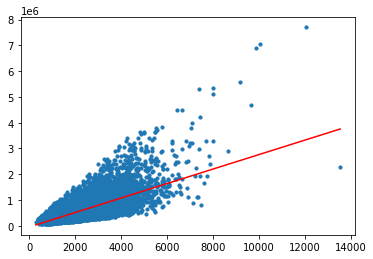

In [11]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred1, 'r')
plt.show()

* Model 2: a degree 2 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [12]:
polynomial_features2 = PolynomialFeatures(degree=2)
X2 = polynomial_features2.fit_transform(X)

In [13]:
model2 = LinearRegression().fit(X2, y)
print("Model Intercept: {}".format(model2.intercept_))
print("Model Coefficient: {}".format(model2.coef_))

Model Intercept: 199222.27930537058
Model Coefficient: [0.00000000e+00 6.79940947e+01 3.85812609e-02]


In [14]:
y_pred2 = model2.predict(X2)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred2)))
print("R2: {}".format(r2_score(y, y_pred2)))

mean sqaured error: 62975083210.96574
R2: 0.5327430940591442


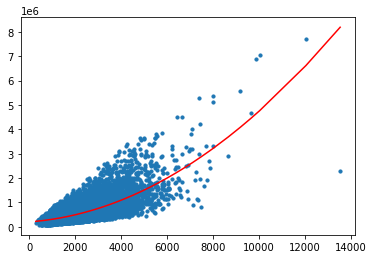

In [15]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred2, 'r')
plt.show()

* Model 3: a degree 3 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [16]:
polynomial_features3 = PolynomialFeatures(degree=3)
X3 = polynomial_features3.fit_transform(X)

In [17]:
model3 = LinearRegression().fit(X3, y)
print("Model Intercept: {}".format(model3.intercept_))
print("Model Coefficient: {}".format(model3.coef_))

Model Intercept: 336819.7482188921
Model Coefficient: [ 0.00000000e+00 -9.01819864e+01  8.70465088e-02 -3.84055260e-06]


In [18]:
y_pred3 = model3.predict(X3)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred3)))
print("R2: {}".format(r2_score(y, y_pred3)))

mean sqaured error: 62131188192.98376
R2: 0.5390045510503199


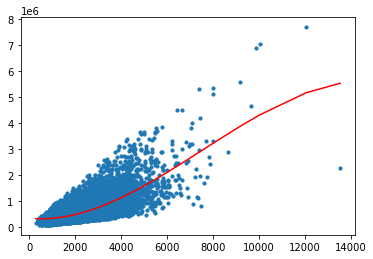

In [19]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred3, 'r')
plt.show()

* Model 4: a degree 15 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [20]:
polynomial_features4 = PolynomialFeatures(degree=15)
X4 = polynomial_features4.fit_transform(X)

In [21]:
model4 = LinearRegression().fit(X4, y)
print("Model Intercept: {}".format(model4.intercept_))
print("Model Coefficient: {}".format(model4.coef_))

Model Intercept: 537116.3296377065
Model Coefficient: [ 0.00000000e+00  1.22246901e-50 -5.12584231e-56  3.84822321e-91
  6.46712511e-78  3.14372683e-75  2.68575522e-71  2.26147568e-67
  1.85900299e-63  1.47144116e-59  1.09771012e-55  7.43509038e-52
  4.23015578e-48  1.61618577e-44 -2.49283826e-48  9.59718336e-53]


In [22]:
y_pred4 = model4.predict(X4)
print("mean sqaured error: {}".format(mean_squared_error(y, y_pred4)))
print("R2: {}".format(r2_score(y, y_pred4)))

mean sqaured error: 122528896212.34518
R2: 0.09087102369148792


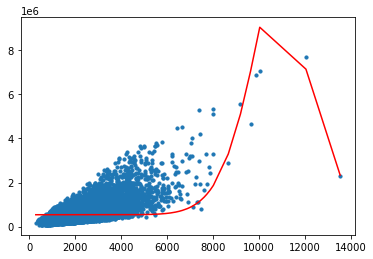

In [23]:
plt.scatter(X, y, s=10)
plt.plot(X, y_pred4, 'r')
plt.show()

# Selecting a Polynomial Degree

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for turicreate.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

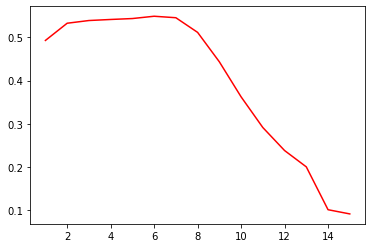

In [24]:
import numpy as np
R2 = np.zeros((len(range(1, 15+1)), ))

for i in range(1, 15+1):
    polynomial_features = PolynomialFeatures(degree=i)
    X_fit = polynomial_features.fit_transform(X)
    
    model = LinearRegression().fit(X_fit, y)
    y_pred = model.predict(X_fit)
    
    R2[i-1] = r2_score(y, y_pred)


plt.plot(range(1, 15+1), R2, 'r')
plt.show()     